In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv("../data/titanic/train.csv")
test_df = pd.read_csv("../data/titanic/test.csv")

# Task 1

## Preprocess the data

In [4]:
# Make int rather than string
train_df["Sex"] = train_df["Sex"].map({"female": 1, "male": 0}).astype(int)
test_df["Sex"] = test_df["Sex"].map({"female": 1, "male": 0}).astype(int)

# Fill with most common port
train_df["Embarked"].fillna('S', inplace=True)
test_df["Embarked"].fillna('S', inplace=True)

# Make int rather than string
train_df["Embarked"] = train_df["Embarked"].map({'S': 0, 'Q': 1, 'C': 2})
test_df["Embarked"] = test_df["Embarked"].map({'S': 0, 'Q': 1, 'C': 2})

In [5]:
# Fill missing values with mode and bin
train_df["Fare"].fillna(train_df["Fare"].mode(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mode(), inplace=True)
test_df["Fare"] = pd.cut(test_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 513], right=True, labels=[0, 1, 2, 3])
train_df["Fare"] = pd.cut(train_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 513], right=True, labels=[0, 1, 2, 3])

# Use KNN imputer to get missing age values
imputer = KNNImputer(n_neighbors=5)
X = train_df["Age"].values.reshape(-1, 1)
transform = imputer.fit_transform(X)
train_df["Age"] = transform

X = test_df["Age"].values.reshape(-1, 1)
transform = imputer.fit_transform(X)
test_df["Age"] = transform



## Select Features

In [34]:
X = train_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = train_df["Survived"].values
lsvc = LinearSVC(penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

In [35]:
model.get_support() # Unused features have a value of False

array([ True,  True,  True,  True,  True,  True,  True])

## Create Decision Tree

In [36]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_new, y)

## Plot Decision Tree

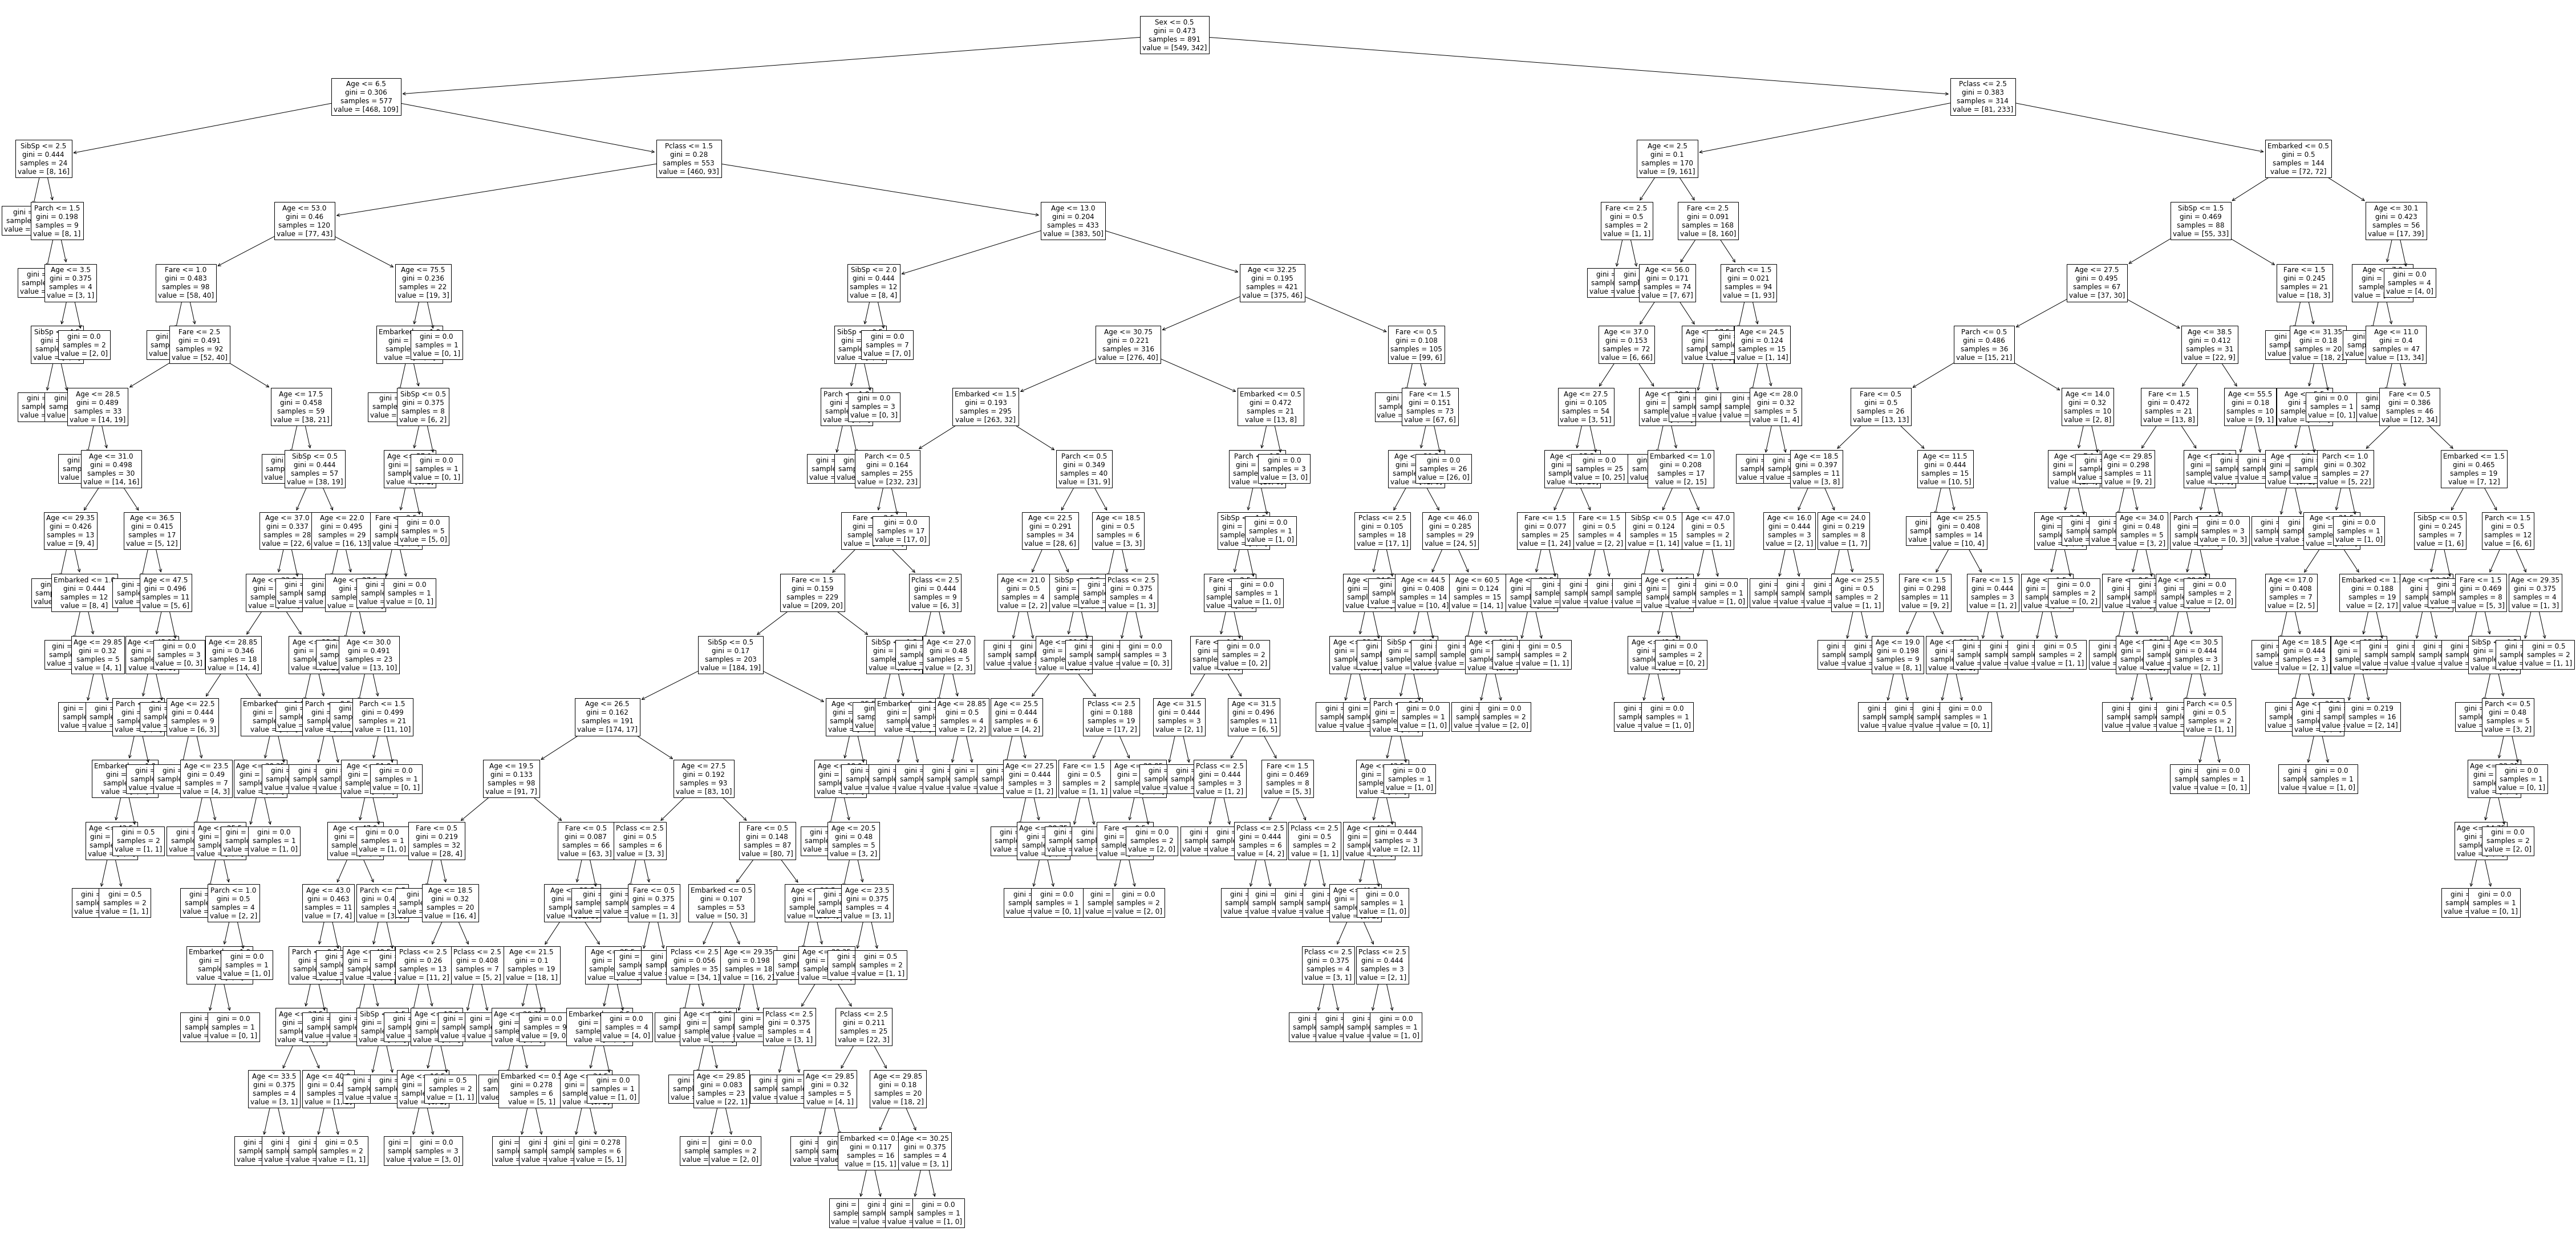

In [37]:
fig, ax = plt.subplots(figsize=(80, 40))
tree.plot_tree(clf, fontsize=12, feature_names=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])
plt.show()

## 5-Fold Cross Validation

### Decision Tree

In [38]:
cross_validate(tree.DecisionTreeClassifier(criterion='gini'), X_new, y, cv=5)["test_score"].mean()

0.7890465130876907

### Random Forest

In [39]:
cross_validate(RandomForestClassifier(criterion='gini'), X_new, y, cv=5)["test_score"].mean()

0.8025045508756513